In [83]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [86]:
df = pd.read_csv("./data/train.csv") 

# ID 컬럼 미사용
df.drop(columns=["ID"], inplace=True)

display(df.head())
display(df.info())
display(df.describe())
display(df.isnull().sum())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,34,blue-collar,married,primary,no,358,yes,no,unknown,23,may,100,4,-1,0,unknown,0
1,33,blue-collar,married,secondary,no,-53,yes,no,unknown,20,may,172,1,-1,0,unknown,0
2,32,management,single,tertiary,no,207,yes,no,cellular,2,feb,56,1,-1,0,unknown,0
3,37,blue-collar,divorced,secondary,no,638,yes,no,cellular,8,may,326,1,326,2,success,0
4,33,housemaid,married,secondary,no,826,yes,no,cellular,11,may,256,1,-1,0,unknown,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   default    31647 non-null  object
 5   balance    31647 non-null  int64 
 6   housing    31647 non-null  object
 7   loan       31647 non-null  object
 8   contact    31647 non-null  object
 9   day        31647 non-null  int64 
 10  month      31647 non-null  object
 11  duration   31647 non-null  int64 
 12  campaign   31647 non-null  int64 
 13  pdays      31647 non-null  int64 
 14  previous   31647 non-null  int64 
 15  poutcome   31647 non-null  object
 16  label      31647 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 4.1+ MB


None

,age,balance,day,duration,campaign,pdays,previous,label
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.916833,1370.050084,15.818277,258.088824,2.752615,40.023604,0.575062,0.116978
std,10.621773,3122.054996,8.315467,255.737568,3.080952,100.154518,2.433034,0.321399
min,18.000000,-4057.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,451.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1418.500000,21.000000,320.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,63.000000,854.000000,275.000000,1.000000


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
label        0
dtype: int64

In [88]:
def split_xy(df):
    X = df.iloc[:, :-1]  
    y = df.iloc[:, -1]   
    return (X, y)


### 오버샘플링 전 Label 분포 확인

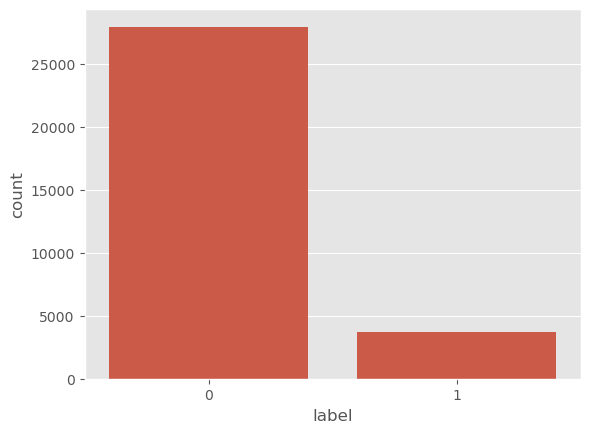

In [90]:
df = pd.read_csv("./data/train.csv")
df.drop(columns=["ID"], inplace=True)

sns.countplot(x="label", data=df);
plt.show()


### 오버샘플링 후 Label 분포 확인

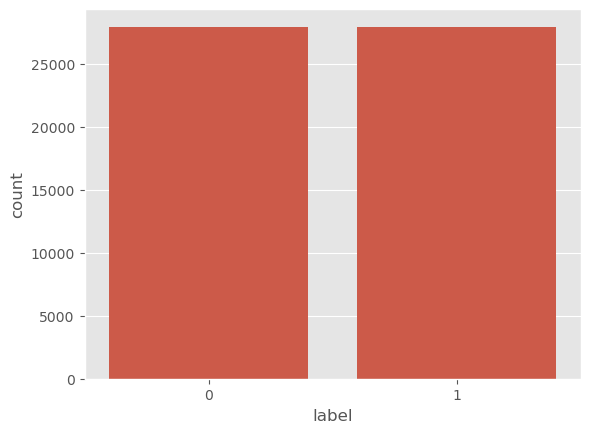

In [94]:
from imblearn.over_sampling import SMOTE

df = pd.read_csv("./data/train.csv")
df.drop(columns=["ID"], inplace=True)

X, y = split_xy(df)

# 샘플링 하려면 범주형 처리 필요함 
X =  pd.get_dummies(X)

smote = SMOTE(random_state=42)
X_resample, y_resampled = smote.fit_resample(X, y)

sns.countplot(x=y_resampled)
plt.show()

### 오버샘플링 전 데이터로 학습 및 평가
- 평가한 데이터는 오버샘플링 후 데이터로 학습한 모델에서 교차 평가 예정

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/train.csv')
#필요 없는 번수 제거
df.drop(columns=["ID"], inplace=True)

# 범주형 변수 인코딩
X = pd.get_dummies(df.iloc[:, :-1])  
y = df.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

model = AdaBoostClassifier(n_estimators=50, learning_rate=1, algorithm='SAMME', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8384
           1       0.64      0.29      0.40      1111

    accuracy                           0.90      9495
   macro avg       0.78      0.63      0.67      9495
weighted avg       0.88      0.90      0.88      9495



### 오버샘플링 후 데이터로 학습 및 평가

In [126]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

df_resample = pd.read_csv("./data/train.csv")
df_resample.drop(columns=["ID"], inplace=True)

X = pd.get_dummies(df_resample.iloc[:, :-1])  
y = df_resample.iloc[:, -1]   

smote = SMOTE(random_state=42)
X_resample, y_resampled = smote.fit_resample(X, y)

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resample = train_test_split(X_resample, y_resampled, test_size=0.3, random_state=42)

model_smote = AdaBoostClassifier(n_estimators=50, learning_rate=1, algorithm='SAMME', random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)

y_resampled_pred = model_smote.predict(X_test_resampled)

print(classification_report(y_test_resample, y_resampled_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8330
           1       0.89      0.91      0.90      8437

    accuracy                           0.90     16767
   macro avg       0.90      0.90      0.90     16767
weighted avg       0.90      0.90      0.90     16767



### 오버샘플링 데이터로 학습한 모델에 오버샘플링 안된 테스트 데이터로 평가

In [127]:
from sklearn.metrics import classification_report

y_pred = model_smote.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8384
           1       0.42      0.62      0.50      1111

    accuracy                           0.86      9495
   macro avg       0.68      0.75      0.71      9495
weighted avg       0.89      0.86      0.87      9495

